importing libraries useful for data manipulation (pandas) data visualization(seaborn and matplotlib) and sklearn for machine learning

In [ ]:
# libraries needed. Included with anaconda
#%pip install sklearn
#%pip install pandas
#%pip install matplotlib

### Reading DataSet
here we are reading the dataset and printing some basic information about it

In [2]:
import pandas as pd

# using linear regression dataset known as car price
# https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe

In [3]:
df = pd.read_csv("data/car_price_dataset.csv")
print(df.count())

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64


In [4]:
df.head(3)  # first 3 rows (instances)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [5]:
df.describe()  # overall statisticals attributes

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()  # types and cleaness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# take only attributes which are interesting for us
df = df[["carlength", "carheight", "carwidth", "enginesize", "horsepower", "peakrpm", "boreratio", "price"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carlength   205 non-null    float64
 1   carheight   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   enginesize  205 non-null    int64  
 4   horsepower  205 non-null    int64  
 5   peakrpm     205 non-null    int64  
 6   boreratio   205 non-null    float64
 7   price       205 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 12.9 KB


In [8]:
# a rough estimation of car geometric volume can be done by multiplication of dimensions
# more volume means probably more weight and due material cost it might exist a correlation between volume and price
df["volume"] = df["carwidth"] * df["carheight"] * df["carlength"]
del df["carlength"]
del df["carheight"]
del df["carwidth"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   enginesize  205 non-null    int64  
 1   horsepower  205 non-null    int64  
 2   peakrpm     205 non-null    int64  
 3   boreratio   205 non-null    float64
 4   price       205 non-null    float64
 5   volume      205 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.7 KB


### plotting columns to inspect distribution

In [9]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'boreratio'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'volume'}>]], dtype=object)

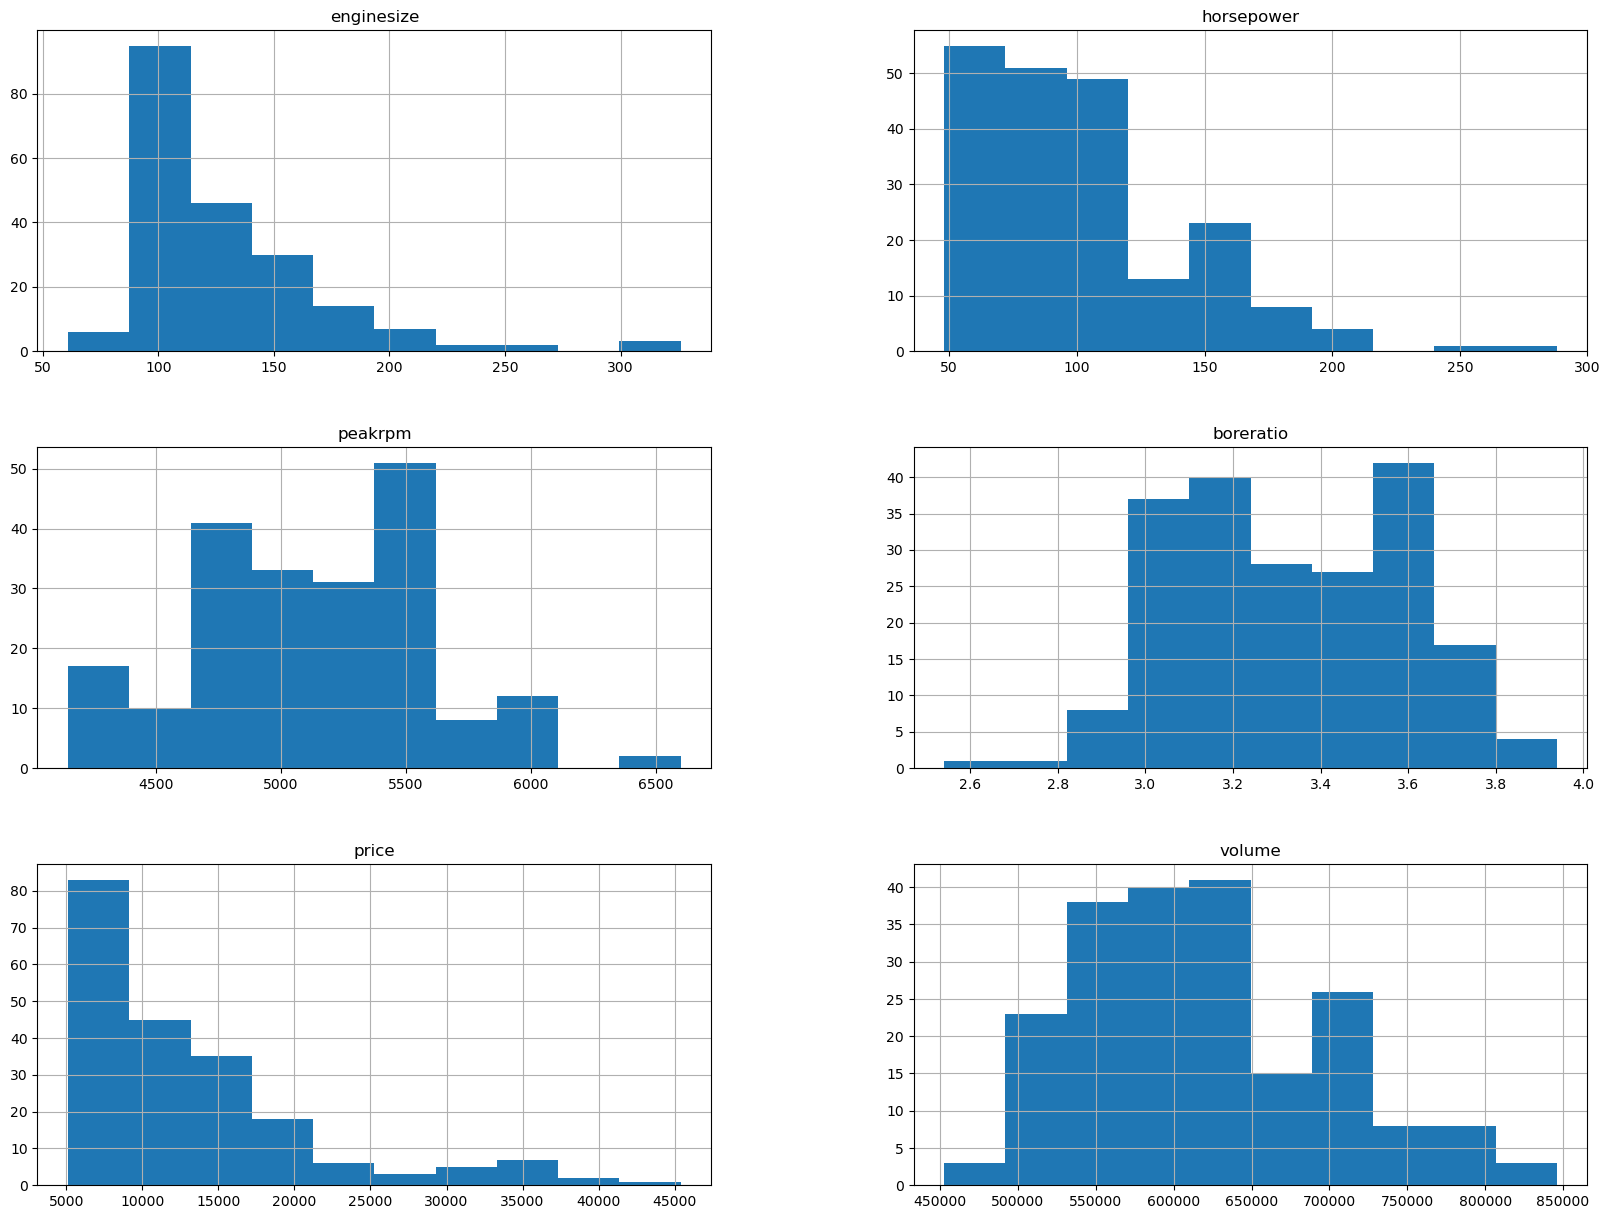

In [10]:
df.hist(figsize=(20, 15))

### data appears to be randomly distributed with constant probability (uniform distribution)

<AxesSubplot:xlabel='price', ylabel='boreratio'>

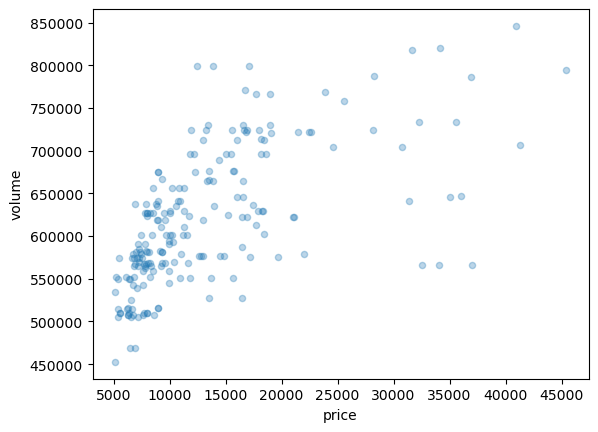

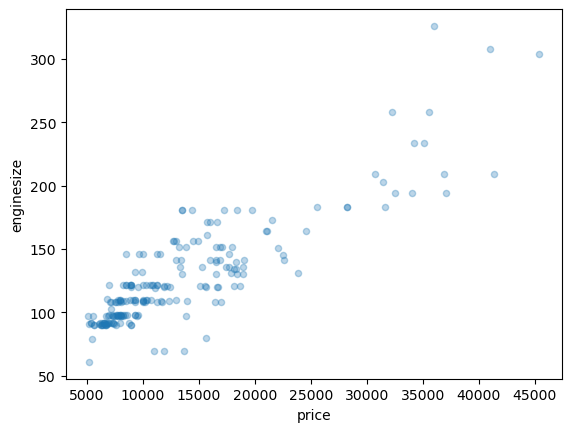

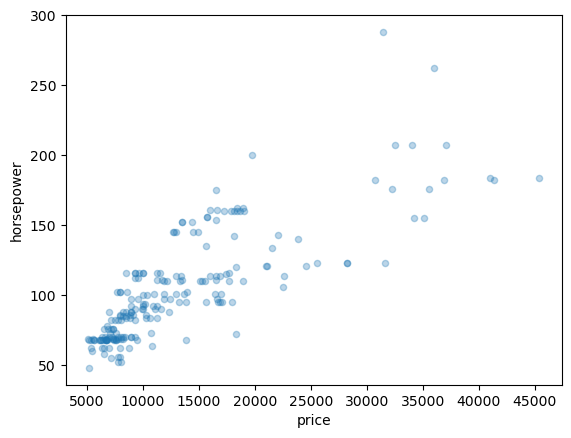

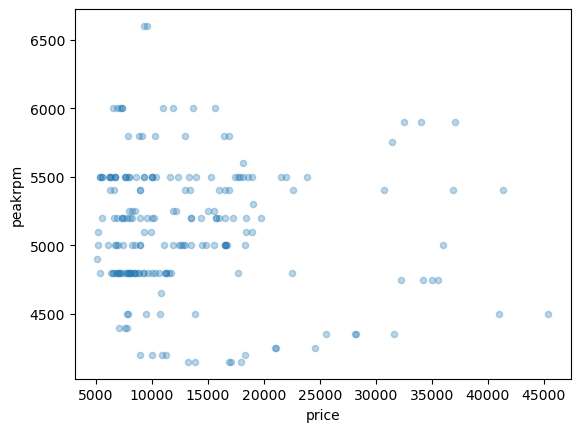

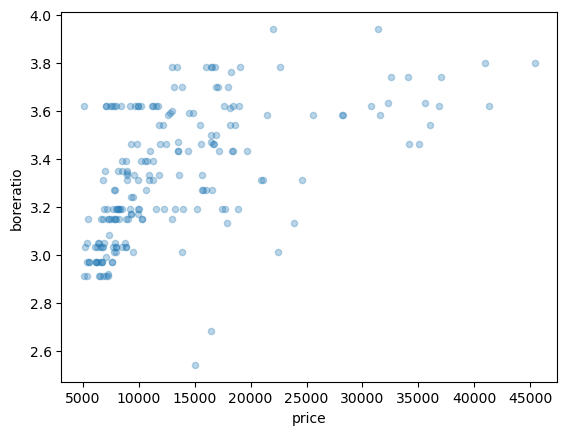

In [11]:
# plotting scatter 2d
df.plot.scatter("price", "volume", alpha=0.3)
df.plot.scatter("price", "enginesize", alpha=0.3)
df.plot.scatter("price", "horsepower", alpha=0.3)
df.plot.scatter("price", "peakrpm", alpha=0.3)
df.plot.scatter("price", "boreratio", alpha=0.3)

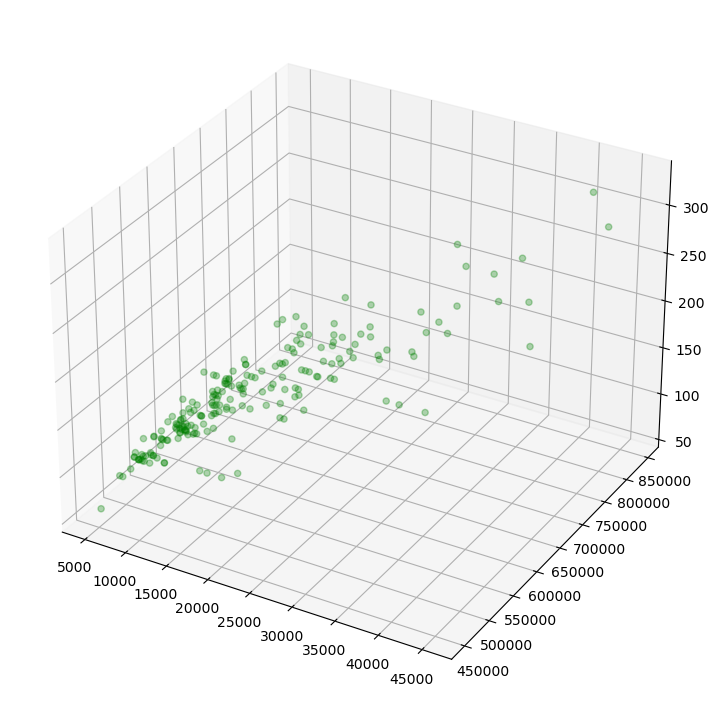

In [12]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection="3d")

# Creating plot
ax.scatter3D(df.price, df.volume, df.enginesize, color="green", alpha=0.3)
plt.show()

### splitting dataset into test and train set

In [13]:
from sklearn.model_selection import train_test_split

# max values of each feature (price included)
maxes = df.max()
# max price
price_max = df.price.max()

# normalize to 1
df = df / maxes

X = df[["volume", "enginesize", "horsepower", "peakrpm", "boreratio"]]  # inputs five features
Y = df["price"]  # outputs

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)  # train and test input outputs

number_of_features = 5
number_of_output = 1

In [14]:

from mlplib import MultiLayerPerception

layers = [
    number_of_features,
    3, # hidden layer
    number_of_output
]


regressor = MultiLayerPerception(layers, activation="sigmoid")
# reshape is used because i take input in vector of vectors (possibly multiple outputs) form, this funny numpy function does the trick to transform my one column vector to multiple vectors each containing one output
regressor.fit(train_X.to_numpy(), train_Y.to_numpy().reshape(-1, 1))
predicates_test = regressor.predict(test_X.to_numpy())
predicates_train = regressor.predict(train_X.to_numpy())


In [15]:
from sklearn.metrics._regression import mean_squared_error, mean_absolute_error, r2_score, max_error


def regression_metrics(y_true, y_pred):
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"r2score: {r2_score(y_true, y_pred)}")
    print(f"max error (scaled): {price_max * max_error(y_true, y_pred)}")

In [16]:
print("for test data:")
regression_metrics(test_Y, predicates_test)

for test data:
MSE: 0.0032904595740769643
MAE: 0.03869010081124068
r2score: 0.886389448058452
max error (scaled): 6835.823292706254


In [17]:
print("for train data:")
regression_metrics(train_Y, predicates_train)

for train data:
MSE: 0.005851924070439978
MAE: 0.054287749855385335
r2score: 0.8089888804869775
max error (scaled): 12584.920301485445
